# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diperoleh dari Kaggle dengan nama **Student Performance Predictions** (https://www.kaggle.com/datasets/haseebindata/student-performance-predictions)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

Dataset pada kaggle saya taroh pada Google Drive agar dapat diakses lebih cepat pada Google Colab

In [40]:
url = 'https://drive.google.com/uc?id=1mEOFj5EuMjcWTmieXEooFSUIe2mGyEta'
df = pd.read_csv(url)

In [41]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

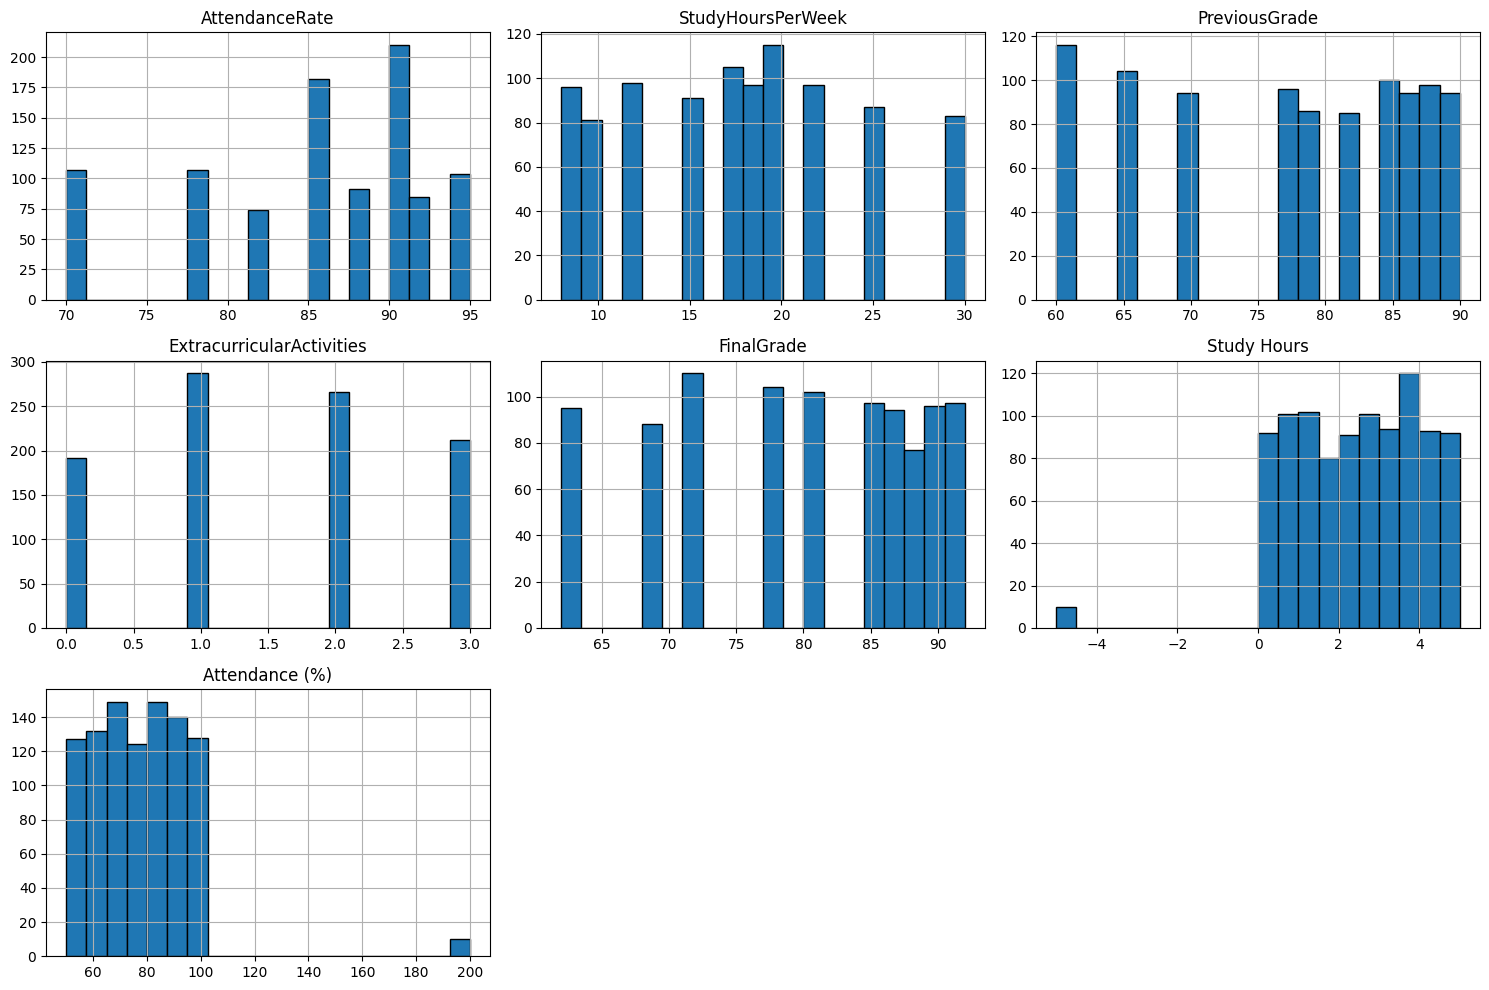

In [43]:
kolom_numerik = df.select_dtypes(include=np.number).columns
kolom_numerik = kolom_numerik.drop('StudentID')

axes = df[kolom_numerik].hist(
    figsize=(15, 10),
    bins=20,
    edgecolor='black'
)

plt.tight_layout()
plt.show()

Dapat dilihat bahwa terdapat beberapa data anomali seperti Study Hours yang bernilai negatif dan juga persentase Attendance Lebih dari 100%.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **Memeriksa nilai Missing Values**

In [44]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
StudentID,40
Name,34
Gender,48
AttendanceRate,40
StudyHoursPerWeek,50
PreviousGrade,33
ExtracurricularActivities,43
ParentalSupport,22
FinalGrade,40
Study Hours,24


## **Imputasi nilai Missing Values**

In [45]:
np.random.seed(42)

df.loc[df['Gender'].isna(), 'Gender'] = np.random.choice(
    ['Male', 'Female'],
    size=df['Gender'].isna().sum()
)

df.loc[df['ParentalSupport'].isna(), 'ParentalSupport'] = np.random.choice(
    ['Low', 'Medium', 'High'],
    size=df['ParentalSupport'].isna().sum()
)

df.loc[df['Online Classes Taken'].isna(), 'Online Classes Taken'] = np.random.choice(
    [True, False],
    size=df['Online Classes Taken'].isna().sum()
)

df.loc[df['ExtracurricularActivities'].isna(), 'ExtracurricularActivities'] = np.random.choice(
    [0.0, 1.0, 2.0, 3.0],
    size=df['ExtracurricularActivities'].isna().sum()
)

In [46]:
kolom_numerik = [
    'AttendanceRate',
    'StudyHoursPerWeek',
    'PreviousGrade',
    'FinalGrade',
    'Study Hours',
    'Attendance (%)'
]

for col in kolom_numerik:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(np.ceil(mean_value))


In [48]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
StudentID,40
Name,34


## **Memeriksa nilai Duplicate**

In [49]:
duplicates = df.duplicated().sum()
print("Jumlah data duplikat:", duplicates)

Jumlah data duplikat: 0


## **Imputasi nilai Duplicate**

Tahapan ini akan dilewati karena tidak terdapat nilai duplikat pada data.

## **Memeriksa nilai Outlier**

In [50]:
results = []

cols = df.select_dtypes(include=['float64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    total_outliers = len(outliers)
    percent_outliers = round((total_outliers / len(df)) * 100, 2)

    results.append({'Kolom': col, 'Jumlah Outliers': total_outliers, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)
display(results_df)

Kolom,Jumlah Outliers,Persentase Outliers
StudentID,0,0.0
AttendanceRate,0,0.0
StudyHoursPerWeek,0,0.0
PreviousGrade,0,0.0
ExtracurricularActivities,0,0.0
FinalGrade,0,0.0
Study Hours,10,1.0
Attendance (%),10,1.0


## **Imputasi nilai Outlier**

Tahapan ini akan dilewati karena **nilai outlier pada Study Hours tidak terlalu jauh**/masih diambang batas normal sedangkan pada **Attendance% tidak akan dipakai pada kolom fitur nanti**.

## **Menghapus kolom yang tidak terpakai**.

In [51]:
df_fitur = df.drop(columns=['StudentID', 'Name', 'Gender', 'Study Hours', 'Attendance (%)'])

In [52]:
df_fitur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AttendanceRate             1000 non-null   float64
 1   StudyHoursPerWeek          1000 non-null   float64
 2   PreviousGrade              1000 non-null   float64
 3   ExtracurricularActivities  1000 non-null   float64
 4   ParentalSupport            1000 non-null   object 
 5   FinalGrade                 1000 non-null   float64
 6   Online Classes Taken       1000 non-null   object 
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


## **Encoding Data Kategorikal**

In [53]:
# Kolom ParentalSupport
df_fitur['ParentalSupport'] = df_fitur['ParentalSupport'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2
})

# Kolom Online Classes Taken
df_fitur['Online Classes Taken'] = df_fitur['Online Classes Taken'].map({
    False: 0,
    True: 1
})

# **6. Hasil Setelah Preprocessing**

In [54]:
df_fitur.head(10)

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Online Classes Taken
0,85.0,15.0,78.0,1.0,2,80.0,0
1,90.0,20.0,85.0,2.0,1,87.0,1
2,78.0,10.0,65.0,0.0,0,68.0,0
3,92.0,25.0,90.0,3.0,2,92.0,0
4,86.0,18.0,82.0,2.0,1,85.0,1
5,95.0,30.0,88.0,1.0,2,81.0,0
6,70.0,8.0,60.0,0.0,0,62.0,0
7,86.0,17.0,77.0,1.0,1,78.0,1
8,82.0,12.0,70.0,2.0,0,72.0,0
9,91.0,22.0,86.0,3.0,2,88.0,1


In [55]:
df_fitur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AttendanceRate             1000 non-null   float64
 1   StudyHoursPerWeek          1000 non-null   float64
 2   PreviousGrade              1000 non-null   float64
 3   ExtracurricularActivities  1000 non-null   float64
 4   ParentalSupport            1000 non-null   int64  
 5   FinalGrade                 1000 non-null   float64
 6   Online Classes Taken       1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


In [57]:
df_fitur.to_csv('student_performance_1000_preprocessing.csv', index=False)